1000 1000


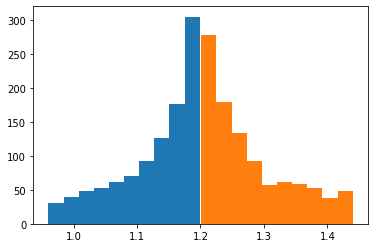

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import random
def get_random(a,b):
    return random.random()*(b-a)+a
def Mysample(func,a,b,c,size):
# a,b,c, is the Monte Carlo range for x,y
# must cover func
# defaut func>0
    cout=0
    res=[]
    while cout<size:
        x=get_random(a,b)
        y=get_random(0,c)
        if(func(x)>y):
            cout+=1
            res.append(x)
    return res

a=np.arange(-10,10,0.1)
#sinh(x)=[e^x-e^(-x)]/2
# y=np.sinh(a)
# plt.plot(a,y)

def gen_price(last_price=1.2,gap_precent=0.001,price_scale=0.2,bid_size=100,ask_size=100):
    Y=np.sinh(10)
    y_max=Y*price_scale
    y_min=Y*gap_precent
    a_max=np.arcsinh(y_max)
    a_min=np.arcsinh(y_min)

    a=np.random.uniform(a_min,a_max,size=[ask_size])
    # print(np.sinh(a),Y,last_price)
    ask_price=np.sinh(a)/Y*last_price+last_price

    a=np.random.uniform(-a_max,-a_min,size=[bid_size])
    bid_price=np.sinh(a)/Y*last_price+last_price
    
    return ask_price,bid_price
def p(a):
    return (1+a*(a**2+1)**(-0.5) )/(a+np.sqrt(a**2+1))
def gen_price1(p,last_price=1.2,gap_precent=0.001,price_scale=0.2,bid_size=100,ask_size=100):
    data=Mysample(p,0,10,1.1,ask_size)
    amin=last_price*(1+gap_precent)
    amax=last_price*(1+price_scale)
    ask_price=np.array(data)/10*(amax-amin)+amin
    
    data=Mysample(p,-10,0,1.1,bid_size)
    amax=last_price*(1-gap_precent)
    amin=last_price*(1-price_scale)
    bid_price=np.array(data)/10*(amax-amin)+amax
    return ask_price,bid_price

old_ask_price,old_bid_price=gen_price1(p,last_price=1.2,bid_size=1000,ask_size=1000)
plt.figure(1)
_=plt.hist(bid_price,10)
_=plt.hist(ask_price,10)
print(len(bid_price),len(ask_price))

# plt.figure(2)
# ask_price,bid_price=gen_price(last_price=1.2,bid_size=1000,ask_size=1000)
# _=plt.hist(bid_price,10)
# _=plt.hist(ask_price,10)
# print(len(bid_price),len(ask_price))

1.2 1.25


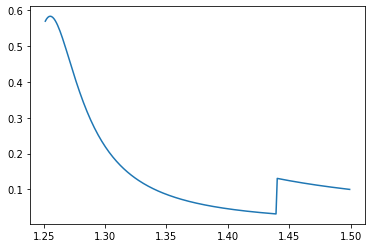

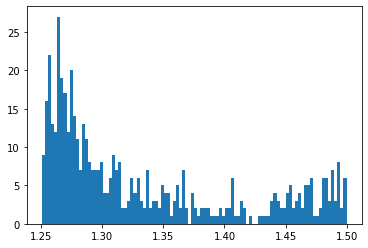

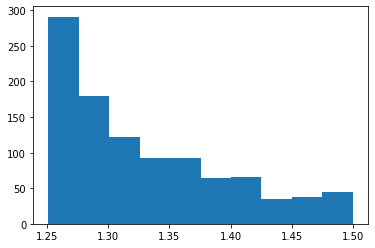

In [99]:


gap_precent=0.001
price_scale=0.2
def p(a):
    return (1+a*(a**2+1)**(-0.5))/(a+np.sqrt(a**2+1))
def p1(a,last_price):
    amin=last_price*(1+gap_precent)
    amax=last_price*(1+price_scale)
    return p((a-amin)/(amax-amin)*10)
# data=Mysample(p,0,10,1.2,10000)
# _,_,_=plt.hist(data,50)

# x=np.arange(amin,amax,0.001)
# y=[p1(i,last_price) for i in x]
# y=list(map(p1, x,amin,amax))
# y1=list(map(p1,x-delta))

# plt.plot(x,y)
# plt.plot(x,np.array(y1)-np.array(y))
last_price=1.2
amin=last_price*(1+gap_precent)
amax=last_price*(1+price_scale)
last_price1=1.25
amin1=last_price1*(1+gap_precent)
amax1=last_price1*(1+price_scale)
x=np.arange(amin1,amax1,0.001)
# y=[p1(i,last_price1) for i in x]
# plt.plot(x,y)

def P_diff(x):
    a=last_price1*(1+gap_precent)
    b=last_price*(1+price_scale)
    c=last_price1*(1+price_scale)
    if a>b:
        return p1(x,last_price1)
    if x>=a and x<=b:
        return p1(x,last_price1)-p1(x,last_price)
    if x>b and x<=c:
        return p1(x,last_price1)
    return 0
y=[P_diff(i) for i in x]
plt.figure(1)
plt.plot(x,y)
plt.figure(2)
cancel_ask_price=[i for i in old_ask_price if i <= amin1]
add_ask_order= Mysample(P_diff,amin1,amax1,1,1000-len(cancel_ask_price))
_=plt.hist(add_ask_order,100)
print(last_price,last_price1)#cancle ask_order between them
new_ask_price=[i for i in old_ask_price if i > amin1]
new_ask_price.extend(add_ask_order)
plt.figure(3)
_=plt.hist(new_ask_price)

In [101]:
print(len(new_ask_price))

1024


1005 1024


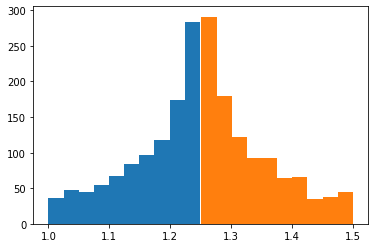

In [108]:

def p2(a,last_price):
    bmax=last_price*(1-gap_precent)
    bmin=last_price*(1-price_scale)
    return p((a-bmax)/(bmax-bmin)*10)
bmax=last_price*(1-gap_precent)
bmin=last_price*(1-price_scale)
x=np.arange(bmin,bmax,0.001)
# y=[p2(i,last_price) for i in x]
# plt.figure(1)
# plt.plot(x,y)

bmax1=last_price1*(1-gap_precent)
bmin1=last_price1*(1-price_scale)
x=np.arange(bmin1,bmax1,0.001)
# y=[p2(i,last_price1) for i in x]
# plt.figure(1)
# plt.plot(x,y,'r')
def P_diff1(x):
    return p2(x,last_price1)
add_bid_order= Mysample(P_diff1,bmin1,bmax1,1,1000)
new_add_bid_price=[i for i in add_bid_order if i>bmax]
# plt.figure(2)
# _=plt.hist(new_add_bid_price,100)

def cancel_by_prob(p):
    if random.random()<p:
        return True
    return False

cancel_bid_price=[]
for i in old_bid_price:
    if i<bmax and i>bmin1:
        prob=(p2(i,last_price)-p2(i,last_price1))/p2(i,last_price)
        if cancel_by_prob(prob):
            cancel_bid_price.append(i)
    else:
        cancel_bid_price.append(i)
new_bid_price=[]
new_bid_price.extend(old_bid_price)
# print(cancel_bid_price)
# print(new_bid_price)
# new_bid_price1=[i for i in new_bid_price not in cancel_bid_price]
# new_bid_price=new_bid_price1
# new_bid_price.remove(cancel_bid_price)
for i in cancel_bid_price: new_bid_price.remove(i)
new_bid_price.extend(new_add_bid_price)
plt.figure(3)
_=plt.hist(new_bid_price,10)
_=plt.hist(new_ask_price,10)
print(len(new_bid_price),len(new_ask_price))

# 定义函数

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import random
def get_random(a,b):
    return random.random()*(b-a)+a
def Mysample(func,a,b,c,size):
# a,b,c, is the Monte Carlo range for x,y
# must cover func
# defaut func>0
    cout=0
    res=[]
    while cout<size:
        x=get_random(a,b)
        y=get_random(0,c)
        if(func(x)>y):
            cout+=1
            res.append(x)
    return res

def p(a):
    return (1+a*(a**2+1)**(-0.5) )/(a+np.sqrt(a**2+1))
def gen_price1(p,last_price=1.2,gap_precent=0.001,price_scale=0.2,bid_size=100,ask_size=100):
    data=Mysample(p,0,10,1.1,ask_size)
    amin=last_price*(1+gap_precent)
    amax=last_price*(1+price_scale)
    ask_price=np.array(data)/10*(amax-amin)+amin
    
    data=Mysample(p,-10,0,1.1,bid_size)
    amax=last_price*(1-gap_precent)
    amin=last_price*(1-price_scale)
    bid_price=np.array(data)/10*(amax-amin)+amax
    return ask_price,bid_price
def p1(a,last_price):
    amin=last_price*(1+gap_precent)
    amax=last_price*(1+price_scale)
    return p((a-amin)/(amax-amin)*10)
def p2(a,last_price):
    bmax=last_price*(1-gap_precent)
    bmin=last_price*(1-price_scale)
    return p((a-bmax)/(bmax-bmin)*10)
def P_diff1(x):
    return p2(x,last_price1)
def P_diff(x):
    a=last_price1*(1+gap_precent)
    b=last_price*(1+price_scale)
    c=last_price1*(1+price_scale)
    if a>b:
        return p1(x,last_price1)
    if x>=a and x<=b:
        return p1(x,last_price1)-p1(x,last_price)
    if x>b and x<=c:
        return p1(x,last_price1)
    return 0
def P_diff2(x):
    return p1(x,last_price1)
def P_diff4(x):
    if bmax1<bmin:
        return p1(x,last_price1)
    if x>=bmin and x<=bmax1:
        return p1(x,last_price1)-p1(x,last_price)
    if x<=bmin:
        return p1(x,last_price1)
    return 0
def cancel_by_prob(p):
    if random.random()<p:
        return True
    return False
def update_boundary(last_price):
    amin=last_price*(1+gap_precent)
    amax=last_price*(1+price_scale)
    bmax=last_price*(1-gap_precent)
    bmin=last_price*(1-price_scale)
    return amin,amax,bmax,bmin

def update_priceup(last_price,last_price1,old_ask_price,old_bid_price):
    amin,amax,bmax,bmin=update_boundary(last_price)
    amin1,amax1,bmax1,bmin1=update_boundary(last_price1)
    # deal ask_price
    #先撤单
    cancel_ask_price=[i for i in old_ask_price if i <= amin1]
    #撤多少补多少
    add_ask_price= Mysample(P_diff,amin1,amax1,1,len(cancel_ask_price))
    new_ask_price=[i for i in old_ask_price if i > amin1]
    new_ask_price.extend(add_ask_price)

    # deal bid_price
    #先按比率撤单
    cancel_bid_price=[]
    for i in old_bid_price:
        if i<bmax and i>bmin1:
            prob=(p2(i,last_price)-p2(i,last_price1))/p2(i,last_price)
            if cancel_by_prob(prob):
                cancel_bid_price.append(i)
        else:
            cancel_bid_price.append(i)
    new_bid_price=[]
    new_bid_price.extend(old_bid_price)
    for i in cancel_bid_price: new_bid_price.remove(i)
    #撤多少补多少
    add_bid_price= Mysample(P_diff1,max(bmax,bmin1),bmax1,1,1000-len(new_bid_price))
    new_bid_price.extend(add_bid_price)
    return new_bid_price,new_ask_price,cancel_bid_price,cancel_ask_price,add_bid_price,add_ask_price

# deal ask_price
#先按比率撤单
def update_pricedown(last_price,last_price1,old_ask_price,old_bid_price):
    amin,amax,bmax,bmin=update_boundary(last_price)
    amin1,amax1,bmax1,bmin1=update_boundary(last_price1)
    cancel_ask_price=[]
    for i in old_ask_price:
        if i<amax1:
            prob=(p2(i,last_price)-p2(i,last_price1))/p2(i,last_price)
            if cancel_by_prob(prob):
                cancel_ask_price.append(i)
        else:
            cancel_ask_price.append(i)
    new_ask_price=[]
    new_ask_price.extend(old_ask_price)
    for i in cancel_ask_price: new_ask_price.remove(i)
    #撤多少补多少
    add_ask_price= Mysample(P_diff2,amin1,min(amin,amax1),1,1000-len(new_ask_price))
    new_ask_price.extend(add_ask_price)

    # deal bid_price
    #先撤单
    cancel_bid_price=[i for i in old_bid_price if i >= bmax1]
    #撤多少补多少
    add_bid_price= Mysample(P_diff4,bmin1,bmax1,1,len(cancel_bid_price))
    new_bid_price=[i for i in old_bid_price if i < bmax1]
    new_bid_price.extend(add_bid_price)
    return new_bid_price,new_ask_price,cancel_bid_price,cancel_ask_price,add_bid_price,add_ask_price
def update_pricechange(last_price,last_price1,old_ask_price,old_bid_price): 
    if last_price1>last_price:
        return update_priceup(last_price=last_price,last_price1=last_price1,old_ask_price=old_ask_price,old_bid_price=old_bid_price)
    else:
        return update_pricedown(last_price=last_price,last_price1=last_price1,old_ask_price=old_ask_price,old_bid_price=old_bid_price)

# 初始化

1000 1000


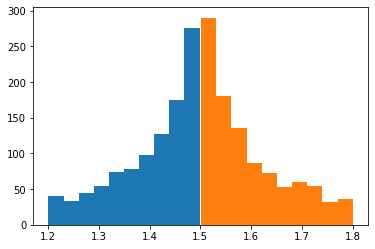

In [2]:
gap_precent=0.001
price_scale=0.2
last_price=1.5
# amin,amax,bmax,bmin=update_boundary(last_price)
old_ask_price,old_bid_price=gen_price1(p,last_price=last_price,bid_size=1000,ask_size=1000)
plt.figure(1)
_=plt.hist(old_bid_price,10)
_=plt.hist(old_ask_price,10)
print(len(old_bid_price),len(old_ask_price))

# 价格变化

1000 1000
786
786


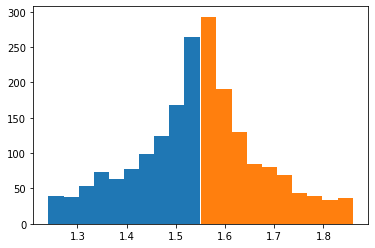

In [6]:
last_price1=1.55
new_bid_price,new_ask_price,cancel_bid_price,cancel_ask_price,add_bid_price,add_ask_price=update_pricechange(last_price=last_price,last_price1=last_price1,old_ask_price=old_ask_price,old_bid_price=old_bid_price)
plt.figure(3)
_=plt.hist(new_bid_price,10)
_=plt.hist(new_ask_price,10)
print(len(new_bid_price),len(new_ask_price))
print(len(add_bid_price)+len(add_ask_price))
print(len(cancel_bid_price)+len(cancel_ask_price))

In [ ]:
import math
print(delta_p(delta))
print(delta_F(delta+10)-delta_F(delta))
def gen_dis(size=100,low=0,up=1):#cdf必须递增或者在递增区间
    mid=(low+up)/2
    if size==1: return [mid]
    p_left=(delta_F(mid)-delta_F(low))/(delta_F(up)-delta_F(low))
    if p_left>=0.5:
        size_left=math.ceil(size*p_left)
        size_right=size-size_left
    else:
        size_right=math.ceil(size*(1-p_left))
        size_left=size-size_right
    if size_left==0:return gen_dis(size=size_right,low=mid,up=up)
    if size_right==0:return gen_dis(size=size_left,low=low,up=mid)
    # print(size_left,p_left,size)
    left=gen_dis(size=size_left,low=low,up=mid)
    right=gen_dis(size=size_right,low=mid,up=up)
    left.extend(right)
    return left
        
res=gen_dis(size=100,low=2.5,up=10)
plt.hist(res,100)

Error: Session cannot generate requests

(array([ 4.,  3.,  4.,  3.,  4.,  4.,  4.,  3.,  4.,  4.,  5.,  4.,  4.,
         5.,  5.,  4.,  5.,  5.,  6.,  5.,  6.,  5.,  6.,  6.,  7.,  7.,
         6.,  8.,  7.,  8.,  8.,  9.,  9., 10., 10., 11., 12., 12., 13.,
        15., 15., 17., 19., 20., 23., 24., 28., 29., 32., 33., 34., 32.,
        29., 28., 24., 23., 20., 19., 17., 15., 15., 13., 12., 12., 11.,
        10., 10.,  9.,  9.,  8.,  8.,  7.,  8.,  6.,  7.,  7.,  6.,  6.,
         5.,  6.,  5.,  6.,  5.,  5.,  4.,  5.,  5.,  4.,  4.,  5.,  4.,
         4.,  3.,  4.,  4.,  4.,  3.,  4.,  3.,  4.]),
 array([-7.5, -7.3, -7.1, -6.9, -6.7, -6.5, -6.3, -6.1, -5.9, -5.7, -5.5,
        -5.3, -5.1, -4.9, -4.7, -4.5, -4.3, -4.1, -3.9, -3.7, -3.5, -3.3,
        -3.1, -2.9, -2.7, -2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1,
        -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9,  1.1,
         1.3,  1.5,  1.7,  1.9,  2.1,  2.3,  2.5,  2.7,  2.9,  3.1,  3.3,
         3.5,  3.7,  3.9,  4.1,  4.3,  4.5,  4.7,  4.9,  5.1,  5

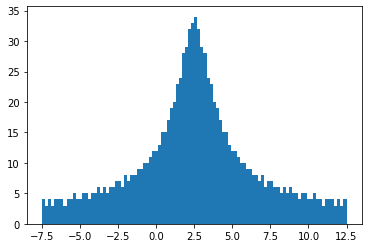

In [95]:


x=np.arange(-10,10,0.001)
def F(a):
    return np.log(a+np.sqrt(np.power(a,2)+1))
# y=list(map(F,x))
# plt.plot(x,y)
# plt.plot(x,np.sinh(x))
fa=500/(F(10)-F(0))
a=[]
for i in range(-500,501):
    a.append(np.sinh(i/fa+F(0)))

bids_price=list(filter(lambda x:x<0,a))
asks_price=list(filter(lambda x:x>0,a))

b=[]
for i in range(-500,501):
    b.append(np.sinh(i/fa+F(0))+delta)

plt.hist(b,100)
# a->b

# 撤销0,delta之间的卖单
for i in asks_price:
    if i<delta:
        asks_price.remove(i)


    
# 补挂delta，y_max之间的卖单


In [102]:

print(len(bids_price),len(asks_price))

500 500


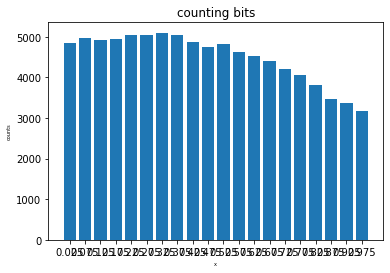

In [103]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import collections

lookup_table_size = 40
CDFlookup_table = np.zeros((lookup_table_size))

count_dict = dict()
bin_count = 20

def inverse_cdf_numerically(y):
    global lookup_table_size
    global CDFlookup_table
    value = 0.0
    for i in range(lookup_table_size):
        x = i * 1.0 / (lookup_table_size - 1)
        value += pdf2(x)
        CDFlookup_table[i] = value
    CDFlookup_table /= value  # normalize the cdf

    if y < CDFlookup_table[0]:  
        t = y / CDFlookup_table[0]
        return t / lookup_table_size
    index = -1
    for j in range(lookup_table_size):
        if CDFlookup_table[j] >= y:
            index = j
            break
    # linear interpolation
    t = (y - CDFlookup_table[index - 1]) / \
        (CDFlookup_table[index] - CDFlookup_table[index - 1])
    fractional_index = index + t  # 因为index从0开始,所以不是 (index-1)+t
    return fractional_index / lookup_table_size


def inverseCDF():
    """
    return the x value in PDF
    """
    uniform_random = random.random()
    return inverse_cdf_numerically(uniform_random)


def pdf2(x):
    return (x * x * x - 10.0 * x * x + 5.0 * x + 11.0) / (10.417)

def draw_pdf(D):
    global bin_count
    D = collections.OrderedDict(sorted(D.items()))
    plt.bar(range(len(D)), list(D.values()), align='center')
    value_list = [(key + 0.5) / bin_count for key in D.keys()]
    plt.xticks(range(len(D)), value_list)
    plt.xlabel('x', fontsize=5)
    plt.ylabel('counts', fontsize=5)
    plt.title('counting bits')
    plt.show()


for i in range(90000):
    x = inverseCDF()
    bin = math.floor(x * bin_count)  # type(bin): int
    count_dict[bin] = count_dict.get(bin, 0) + 1

draw_pdf(count_dict)


In [10]:
from IPython.display import Latex,display
import sympy
sympy.init_printing()
x,y=sympy.symbols("x,y")
f=x**2+sympy.Abs(y)
display(Latex(f"$$fgf$$"))

<IPython.core.display.Latex object>

In [15]:
from IPython.display import display, Latex
import sympy as sy
sy.init_printing()

x,y=sy.symbols("x y")
f=x**2+3*x-5
display(Latex(f"$$f(x)={sy.latex(f)}$$"))

xx=3
sy.pprint(f"f({xx})={f.subs({x:xx})}")
yy=4
f1=sy.sqrt(x**2+y**2)

display(Latex(f"$$f_1(x,y)={sy.latex(f1)}$$"))
sy.pprint(f"f1({xx},{yy})={f1.subs({x:xx, y:yy})}")

<IPython.core.display.Latex object>

f(3)=13


<IPython.core.display.Latex object>

f1(3,4)=5


In [27]:
#sample from [a,b] according to probability density funtion f(x)
def f(x):
    return x**2
import random
def get_random(a,b):
    return random.random()*(b-a)+a
def sample(func,a,b,c,size):
# a,b,c, is the Monte Carlo range for x,y
# must cover func
# defaut func>0
    cout=0
    res=[]
    for i in range(size):
        x=get_random(a,b)
        y=get_random(0,c)
        if(func(x)>y):
            cout+=1
            res.append(x)
    return res
data=sample(f,2,3,10,10000)      

# Latex(r"$f(x) = 3x + 7$")

$$ \int_{\infty}^{+\infty}{(x^2+3)dx}$$
$$\left. \frac{\partial f(x, y)}{\partial x}\right|_{x=0}\qquad$$